In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from fuzzywuzzy import fuzz
import fuzzymatcher

In [2]:
df = pd.read_csv('data/director.csv')

In [3]:
df

,Unnamed: 0,movie_title,budget,domestic_opening_sales,director
0,0,Star Wars: Episode VII,245000000,247966675,J.J. Abrams
1,1,Avengers: Endgame,356000000,357115007,Anthony Russo
2,2,Avatar,237000000,77025481,James Cameron
3,3,Black Panther,200000000,202003951,Ryan Coogler
4,4,Avengers: Infinity War,300000000,257698183,Anthony Russo
...,...,...,...,...,...
718,738,Jack Reacher,60000000,15210156,Christopher McQuarrie
719,739,Cloverfield,25000000,40058229,Matt Reeves
720,740,Dear John,25000000,30468614,Lasse Hallström
721,741,Men in Black: International,110000000,30035838,F. Gary Gray


In [55]:
total_sales = df['domestic_opening_sales'].sum()

In [4]:
director_list = df['director'].unique().tolist()

In [28]:
director_list

['J.J. Abrams',
 'Anthony Russo',
 'James Cameron',
 'Ryan Coogler',
 'Colin Trevorrow',
 'Joss Whedon',
 'Rian Johnson',
 'Brad Bird',
 'Christopher Nolan',
 'Gareth Edwards',
 'Andrew Stanton',
 'Chris Buck',
 'Andrew Adamson',
 'Josh Cooley',
 'Anna Boden',
 'Francis Lawrence',
 'Gore Verbinski',
 'J.A. Bayona',
 'Lee Unkrich',
 'Patty Jenkins',
 'Shane Black',
 'Gary Ross',
 'Sam Raimi',
 'Jake Kasdan',
 'Michael Bay',
 'Jon Watts',
 'James Gunn',
 'David Yates',
 'George Lucas',
 'Peter Jackson',
 'Mel Gibson',
 'Chris Renaud',
 'Pierre Coffin',
 'Jon Favreau',
 'Tim Miller',
 'Pete Docter',
 'James Wan',
 'Clint Eastwood',
 'Byron Howard',
 'Kyle Balda',
 'Todd Phillips',
 'Tim Burton',
 'Zack Snyder',
 'Andy Muschietti',
 'David Ayer',
 'David Leitch',
 'Chris Miller',
 'Chris Columbus',
 'Steven Spielberg',
 'Taika Waititi',
 'Sam Mendes',
 'David Slade',
 'Chris Weitz',
 'Bill Condon',
 'Mike Newell',
 'Lana Wachowski',
 'Jay Roach',
 'Alfonso Cuarón',
 'Yarrow Cheney',
 'Gart

In [12]:
df1 = df.groupby('director').sum('domestic_opening_sales')

In [44]:
df2 = df1.sort_values('domestic_opening_sales',ascending = False).head(50).reset_index()

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   director                50 non-null     object
 1   Unnamed: 0              50 non-null     int64 
 2   budget                  50 non-null     int64 
 3   domestic_opening_sales  50 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [46]:
top50_director = df2['director'].unique().tolist()

In [56]:
top50_sales = df2['domestic_opening_sales'].sum()

In [57]:
top50_sales/total_sales

0.44917135374406175

In [49]:
top50_director

['Anthony Russo',
 'J.J. Abrams',
 'David Yates',
 'Christopher Nolan',
 'Michael Bay',
 'Zack Snyder',
 'Francis Lawrence',
 'Peter Jackson',
 'Sam Raimi',
 'Bryan Singer',
 'Joss Whedon',
 'Jon Favreau',
 'Gore Verbinski',
 'Brad Bird',
 'James Wan',
 'Todd Phillips',
 'Peyton Reed',
 'Tim Burton',
 'Justin Lin',
 'Bill Condon',
 'Ridley Scott',
 'Steven Spielberg',
 'Andrew Adamson',
 'Andrew Stanton',
 'Ron Howard',
 'M. Night Shyamalan',
 'Brett Ratner',
 'Gareth Edwards',
 'Rian Johnson',
 'James Gunn',
 'Roland Emmerich',
 'Ryan Coogler',
 'Tim Story',
 'Chris Renaud',
 'Pete Docter',
 'Gary Ross',
 'Andy Muschietti',
 'Peter Segal',
 'Chris Columbus',
 'Jon Watts',
 'Colin Trevorrow',
 'F. Gary Gray',
 'Paul Greengrass',
 'Shawn Levy',
 'Carlos Saldanha',
 'Eric Darnell',
 'James Mangold',
 'George Lucas',
 'Kyle Balda',
 'David Leitch']

In [21]:
df1.describe()

,Unnamed: 0,budget,domestic_opening_sales
count,366.00000,3.660000e+02,3.660000e+02
mean,739.70765,1.932071e+08,9.543914e+07
std,559.72200,2.181809e+08,1.098738e+08
min,2.00000,1.500000e+04,7.787300e+04
25%,374.25000,5.000000e+07,3.088366e+07
50%,617.50000,1.165000e+08,5.389678e+07
75%,998.25000,2.550000e+08,1.247093e+08
max,3183.00000,1.242000e+09,8.889761e+08


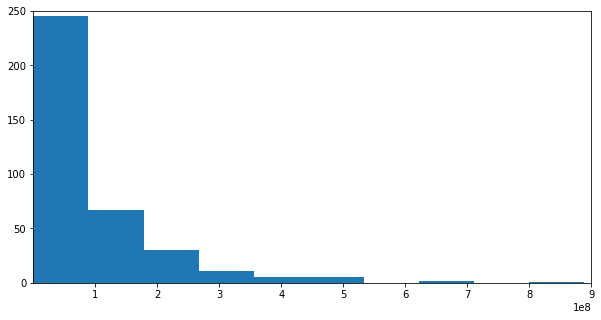

In [27]:
plt.figure(figsize = [10,5])
plt.hist(df1['domestic_opening_sales'],10)
plt.axis([150000, 900000000, 0, 250]); 
plt.show;